# Results and Discussion

# Background

Traditional monitoring systems, which can be highly expensive and need significant infrastructure, can be replaced by inexpensive air quality sensors (Great Basin Unified Air Pollution Control District, n.d.).

A portion of the price of regulatory-grade monitors, these types of sensors provide real-time data on a variety of pollutants, which makes them affordable for community use (Davda, 2024).

Low-cost sensors can achieve 80% to 90% accuracy when validated properly when compared to reference monitors. However, they might not be able to completely replace traditional sensors because of the possibility of data differences, (Kang et al., 2021).

Their portability and accessibility of use enable dense networks of monitoring in underprivileged areas, enhancing public health plans and supporting current initiatives (World Meteorological Organization, 2024; Kunak Technologies S.L., 2023).

## Objective
- Identify which sensor can be eliminated to optimally reduce cost.

## Hypothesis
- Eliminating the no sensor (Nitric Oxide) in N. Mai, Los Angeles California (CA), will have a minimal impact on overall air quality monitoring. This
is based on the strong correlation, interdependence, or redundancy of `no` with other related pollutants, such as `no2` and `nox`. By leveraging
data from these sensors, it can effectively derive `no` levels, thereby optimally reducing project expenses while maintaining the integrity of air
quality data.

## Data

As for this part, I pulled installed the necessary libraries such as pyspark, findspark, and installed awscii or the AWS 3 for data pulling from my chosen location ID (`7936`) which is from `Los Angeles, CA`, specifically at `N. Mai`.

In [5]:
# Installed the Spark libraries
!pip install pyspark
!pip install findspark

In [6]:
# Installed the awscli or the AWS S3 for pulling the data from chosen location ID
!pip install awscli

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.21.2
    Uninstalling docutils-0.21.2:
      Successfully uninstalled docutils-0.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 8.1.3 requires docutils<0.22,>=0.20, but you have docutils 0.16 which is incompatible.


In [7]:
# Imported the matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Imported the findspark
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder \
        .master('local[*]') \
        .appName('Methodology') \
        .getOrCreate()

print(spark.version)

3.5.3


In [9]:
# Created a directory for the data
!mkdir raw_7936
!ls

raw_7936  sample_data


In [10]:
# Extracted data from AWS S3 openaq-data-archive similar with previous coding exercises.
!aws s3 cp --recursive --no-sign-request s3://openaq-data-archive/records/csv.gz/locationid=7936/ raw_7936

download: s3://openaq-data-archive/records/csv.gz/locationid=7936/year=2017/month=06/location-7936-20170610.csv.gz to raw_7936/year=2017/month=06/location-7936-20170610.csv.gz
download: s3://openaq-data-archive/records/csv.gz/locationid=7936/year=2017/month=06/location-7936-20170611.csv.gz to raw_7936/year=2017/month=06/location-7936-20170611.csv.gz
download: s3://openaq-data-archive/records/csv.gz/locationid=7936/year=2017/month=06/location-7936-20170609.csv.gz to raw_7936/year=2017/month=06/location-7936-20170609.csv.gz
download: s3://openaq-data-archive/records/csv.gz/locationid=7936/year=2017/month=06/location-7936-20170608.csv.gz to raw_7936/year=2017/month=06/location-7936-20170608.csv.gz
download: s3://openaq-data-archive/records/csv.gz/locationid=7936/year=2017/month=06/location-7936-20170607.csv.gz to raw_7936/year=2017/month=06/location-7936-20170607.csv.gz
download: s3://openaq-data-archive/records/csv.gz/locationid=7936/year=2017/month=06/location-7936-20170612.csv.gz to ra

In [11]:
# Defined the 7938 and displayed top 5 rows from the dataset
df_7936 = spark.read.csv('/content/raw_7936/*/*/', inferSchema=True, header=True)
df_7936.show(5)

+-----------+----------+--------------------+--------------------+---------+-------------------+---------+-----+-----+
|location_id|sensors_id|            location|            datetime|      lat|                lon|parameter|units|value|
+-----------+----------+--------------------+--------------------+---------+-------------------+---------+-----+-----+
|       7936|     25195|Los Angeles - N. ...|2024-10-25T01:00:...|34.066429|-118.22675500000001|     pm10|µg/m³| 30.0|
|       7936|     25195|Los Angeles - N. ...|2024-10-25T02:00:...|34.066429|-118.22675500000001|     pm10|µg/m³| 31.0|
|       7936|     25195|Los Angeles - N. ...|2024-10-25T03:00:...|34.066429|-118.22675500000001|     pm10|µg/m³| 22.0|
|       7936|     25195|Los Angeles - N. ...|2024-10-25T04:00:...|34.066429|-118.22675500000001|     pm10|µg/m³| 28.0|
|       7936|     25195|Los Angeles - N. ...|2024-10-25T05:00:...|34.066429|-118.22675500000001|     pm10|µg/m³| 27.0|
+-----------+----------+--------------------+---

In [12]:
# Displayed the number of rows from the dataset
df_7936.count()

301798

### Summary statistics

In [13]:
# As for this, I initiated with displaying the data types and schema from 7936
df_7936.printSchema()

root
 |-- location_id: string (nullable = true)
 |-- sensors_id: string (nullable = true)
 |-- location: string (nullable = true)
 |-- datetime: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- lon: string (nullable = true)
 |-- parameter: string (nullable = true)
 |-- units: string (nullable = true)
 |-- value: string (nullable = true)



In [14]:
# Displayed the summary of the data and its fields
df_7936.summary().show()

+-------+-----------+------------------+--------------------+--------------------+-----------------+--------------------+---------+------+------------------+
|summary|location_id|        sensors_id|            location|            datetime|              lat|                 lon|parameter| units|             value|
+-------+-----------+------------------+--------------------+--------------------+-----------------+--------------------+---------+------+------------------+
|  count|     301798|            301798|              301798|              301798|           301798|              301798|   301798|301798|            301798|
|   mean|     7936.0|419100.41071842756|                NULL|                NULL|34.06642899999882| -118.22675500000167|     NULL|  NULL|  6.79443538128152|
| stddev|        0.0|1232511.5536995134|                NULL|                NULL|              0.0|1.164382201354442...|     NULL|  NULL|13.225674480539892|
|    min|       7936|             23019|Los Angeles 

In [15]:
# Displaying the summary of the values from the data
df_7936[['value']].summary().show()

+-------+------------------+
|summary|             value|
+-------+------------------+
|  count|            301798|
|   mean|  6.79443538128152|
| stddev|13.225674480539892|
|    min|           -0.0001|
|    25%|             0.006|
|    50%|             0.038|
|    75%|               9.4|
|    max|              99.0|
+-------+------------------+



In [16]:
# I also created or replace the temp view of 7936
df_7936.createOrReplaceTempView('df_7936_view')

In [17]:
# This will display the overview of data from 7936 limiting to 5 rows in tabular format
spark.sql("""
SELECT
  *
FROM
  df_7936_view
LIMIT
  5
""").show()

+-----------+----------+--------------------+--------------------+---------+-------------------+---------+-----+-----+
|location_id|sensors_id|            location|            datetime|      lat|                lon|parameter|units|value|
+-----------+----------+--------------------+--------------------+---------+-------------------+---------+-----+-----+
|       7936|     25195|Los Angeles - N. ...|2024-10-25T01:00:...|34.066429|-118.22675500000001|     pm10|µg/m³| 30.0|
|       7936|     25195|Los Angeles - N. ...|2024-10-25T02:00:...|34.066429|-118.22675500000001|     pm10|µg/m³| 31.0|
|       7936|     25195|Los Angeles - N. ...|2024-10-25T03:00:...|34.066429|-118.22675500000001|     pm10|µg/m³| 22.0|
|       7936|     25195|Los Angeles - N. ...|2024-10-25T04:00:...|34.066429|-118.22675500000001|     pm10|µg/m³| 28.0|
|       7936|     25195|Los Angeles - N. ...|2024-10-25T05:00:...|34.066429|-118.22675500000001|     pm10|µg/m³| 27.0|
+-----------+----------+--------------------+---

In [18]:
# As for this, the procedure just identified the paramaters that are distinct from the data I pulled
spark.sql('''
WITH
distinct_parameter AS (
SELECT
  DISTINCT parameter
FROM
  df_7936_view
)
SELECT
  *
FROM
  distinct_parameter
''').show()

+---------+
|parameter|
+---------+
|      so2|
|       co|
|      nox|
|       o3|
|     pm10|
|      no2|
|       no|
|     pm25|
+---------+



In [19]:
spark.sql("""
WITH
value_7936 AS (
SELECT
  value
FROM
  df_7936_view
)
,summary_stats_of_value_7936 AS (
SELECT
  COUNT(value) AS count
  ,COUNT(DISTINCT value) AS countd
  ,SUM(value) AS sum
  ,AVG(value) AS avg
  ,MIN(value) AS min
  ,PERCENTILE_APPROX(value, 0.25) AS p25
  ,PERCENTILE_APPROX(value, 0.50) AS p50
  ,PERCENTILE_APPROX(value, 0.75) AS p75
  ,MAX(value) AS MAX
  ,COUNT(CASE WHEN value IS NULL THEN 1 ELSE NULL END) AS count_null
  ,COUNT(CASE WHEN value = 0 THEN 1 ELSE NULL END) AS count_zero
FROM
  value_7936
)

SELECT
  *
FROM
  summary_stats_of_value_7936
""").show()

+------+------+------------------+----------------+-------+-----+-----+---+----+----------+----------+
| count|countd|               sum|             avg|    min|  p25|  p50|p75| MAX|count_null|count_zero|
+------+------+------------------+----------------+-------+-----+-----+---+----+----------+----------+
|301798|  1907|2050547.0092000002|6.79443538128152|-0.0001|0.006|0.038|9.4|99.0|         0|    207553|
+------+------+------------------+----------------+-------+-----+-----+---+----+----------+----------+



In [20]:
from pyspark.sql.functions import col, when, count, avg, stddev, min, max, expr, percentile_approx

# Convert 'value' column to double
df_7936 = df_7936.withColumn("value", col("value").cast("double"))

# Grouped Summary Statistics by 'parameter'
summary_stats = df_7936.groupBy("parameter").agg(
    count("value").alias("count"),
    avg("value").alias("avg"),
    stddev("value").alias("stddev"),
    min("value").alias("min"),
    percentile_approx("value", 0.25).alias("p25"),
    percentile_approx("value", 0.5).alias("median"),
    percentile_approx("value", 0.75).alias("p75"),
    max("value").alias("max"),
    count(when(col("value").isNull(), 1)).alias("count_null"),
    count(when(col("value") == 0, 1)).alias("count_zero")
)

# Displaying the computed summary statistics
summary_stats.show(truncate=False)

+---------+-----+--------------------+--------------------+-------+------+------+------+-------------------+----------+----------+
|parameter|count|avg                 |stddev              |min    |p25   |median|p75   |max                |count_null|count_zero|
+---------+-----+--------------------+--------------------+-------+------+------+------+-------------------+----------+----------+
|so2      |46170|2.160298895386617E-4|4.041309755105069E-4|-0.001 |0.0   |0.0   |2.0E-4|0.01               |0         |28635     |
|co       |41529|0.39307977557851115 |0.25275618507603265 |0.0    |0.2   |0.3   |0.5   |2.0                |0         |2         |
|nox      |14004|0.02213774635818337 |0.020635147511218806|8.0E-4 |0.0079|0.0144|0.0288|0.16219999999999998|0         |0         |
|o3       |46634|0.02498601878457775 |0.018367949607866096|0.0    |0.008 |0.025 |0.038 |0.138              |0         |1352      |
|pm10     |46675|29.853519014461703  |16.26855114320419   |-4.0   |19.0  |28.0  |38

# Descriptive Statistics

In [28]:
from pyspark.sql.functions import col, count, avg, stddev, min, max, percentile_approx

# This will be the descriptive statistics for each sensor
descriptive_stats = df_7936.groupBy("parameter").agg(
    count("value").alias("count"),
    avg("value").alias("mean"),
    stddev("value").alias("stddev"),
    min("value").alias("min"),
    percentile_approx("value", 0.25).alias("25th_percentile"),
    percentile_approx("value", 0.5).alias("median"),
    percentile_approx("value", 0.75).alias("75th_percentile"),
    max("value").alias("max")
)

# Displaying the actual descriptive statistics
descriptive_stats.show(truncate=False)

+---------+-----+--------------------+--------------------+-------+---------------+------+---------------+-------------------+
|parameter|count|mean                |stddev              |min    |25th_percentile|median|75th_percentile|max                |
+---------+-----+--------------------+--------------------+-------+---------------+------+---------------+-------------------+
|so2      |46170|2.160298895386617E-4|4.041309755105069E-4|-0.001 |0.0            |0.0   |2.0E-4         |0.01               |
|co       |41529|0.39307977557851115 |0.25275618507603265 |0.0    |0.2            |0.3   |0.5            |2.0                |
|nox      |14004|0.02213774635818337 |0.020635147511218806|8.0E-4 |0.0079         |0.0144|0.0288         |0.16219999999999998|
|o3       |46634|0.02498601878457775 |0.018367949607866096|0.0    |0.008          |0.025 |0.038          |0.138              |
|pm10     |46675|29.853519014461703  |16.26855114320419   |-4.0   |19.0           |28.0  |38.0           |588.0

# Bar chart

In [21]:
from pyspark.sql.functions import col, avg
import matplotlib.pyplot as plt

In [22]:
# This will compute the average concentration value for each sensor
summary_stats = df_7936.groupBy("parameter").agg(
    avg("value").alias("avg_value")
).orderBy("parameter")

In [23]:
# Collecting data from DataFrame
data = summary_stats.collect()

In [24]:
# Extracting sensors and average values for plotting
sensors = [row["parameter"] for row in data]
avg_values = [row["avg_value"] for row in data]

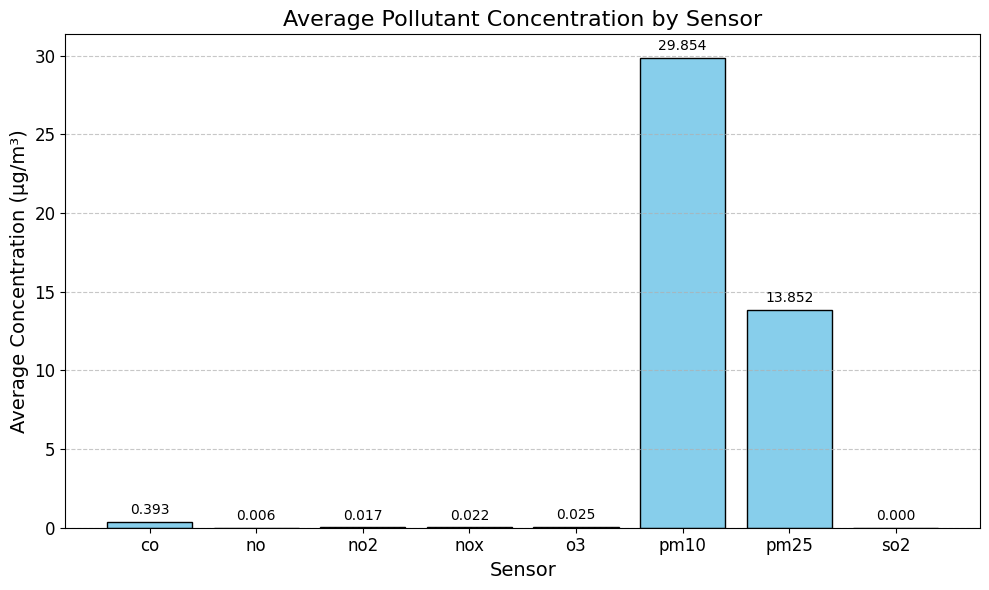

In [27]:
# This part will display the bar chart using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(sensors, avg_values, color='skyblue', edgecolor='black')
plt.title("Average Pollutant Concentration by Sensor", fontsize=16)
plt.xlabel("Sensor", fontsize=14)
plt.ylabel("Average Concentration (µg/m³)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating values on the bars
for index, value in enumerate(avg_values):
    plt.text(index, value + 0.5, f"{value:.3f}", ha='center', fontsize=10)

# Displaying hte actual bar chart
plt.tight_layout()
plt.show()

### Histogram

In [29]:
from pyspark.sql.functions import floor

# Defining the bin size for the histogram
bin_size = 10

In [30]:
# This will create histogram bins by dividing the value column by bin_size and flooring the result
df_binned = df_7936.withColumn("value_bin", floor(col("value") / bin_size) * bin_size)

In [31]:
# This is group by parameter and value_bin to count occurrences in each bin
histogram = df_binned.groupBy("parameter", "value_bin").count().orderBy("parameter", "value_bin")

In [32]:
# Show histogram data
histogram.show(truncate=False)

+---------+---------+-----+
|parameter|value_bin|count|
+---------+---------+-----+
|co       |0        |41529|
|no       |-10      |1586 |
|no       |0        |12422|
|no2      |0        |46689|
|nox      |0        |14004|
|o3       |0        |46634|
|pm10     |-10      |8    |
|pm10     |0        |2358 |
|pm10     |10       |9342 |
|pm10     |20       |14252|
|pm10     |30       |10748|
|pm10     |40       |5678 |
|pm10     |50       |2527 |
|pm10     |60       |980  |
|pm10     |70       |387  |
|pm10     |80       |172  |
|pm10     |90       |80   |
|pm10     |100      |49   |
|pm10     |110      |26   |
|pm10     |120      |14   |
+---------+---------+-----+
only showing top 20 rows



In [33]:
import matplotlib.pyplot as plt

In [34]:
# Collecting histogram data for plotting
histogram_data = histogram.collect()

In [35]:
# Preparing the data for visualization
histogram_dict = {}
for row in histogram_data:
    param = row['parameter']
    bin_value = row['value_bin']
    count = row['count']
    if param not in histogram_dict:
        histogram_dict[param] = {'bins': [], 'counts': []}
    histogram_dict[param]['bins'].append(bin_value)
    histogram_dict[param]['counts'].append(count)

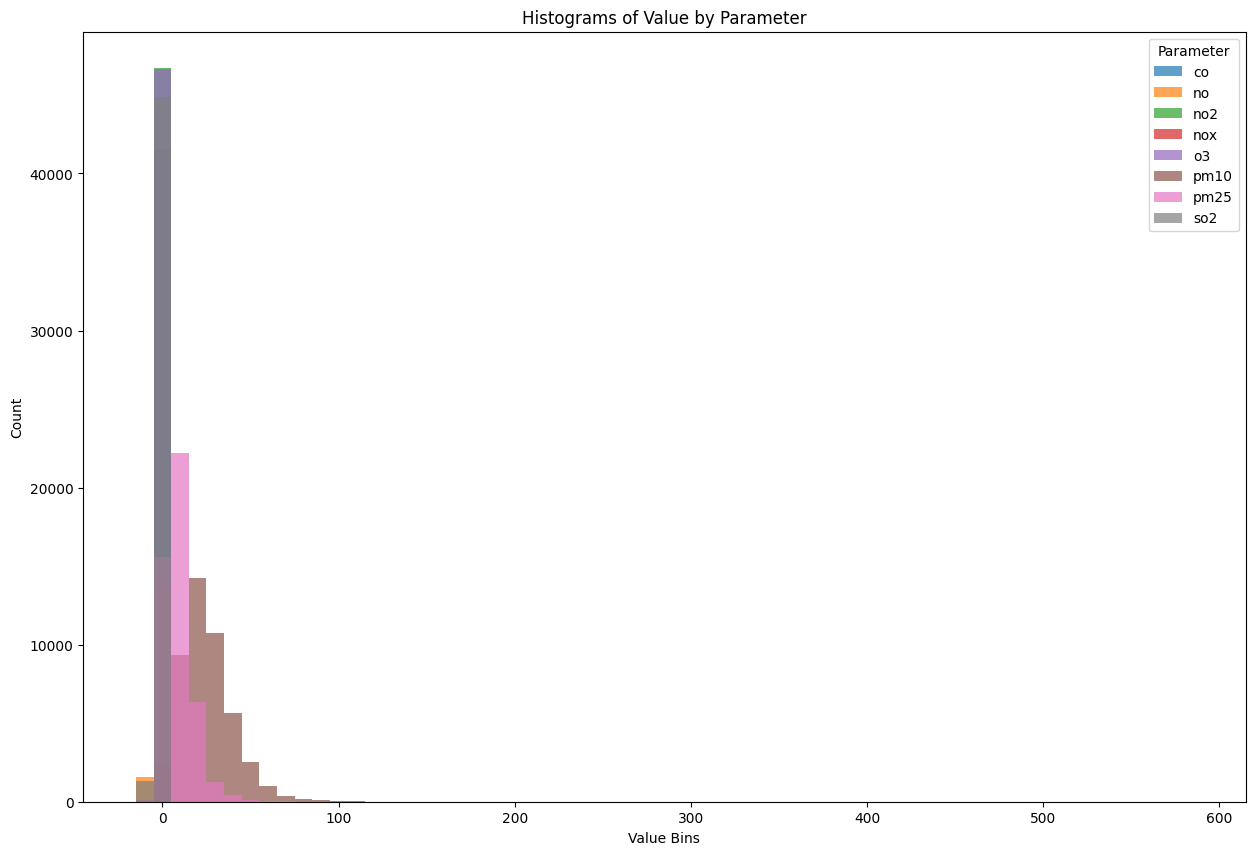

In [36]:
# Plotting histograms for each parameter
plt.figure(figsize=(15, 10))

for param, data in histogram_dict.items():
    plt.bar(data['bins'], data['counts'], width=bin_size, alpha=0.7, label=param)

# I added labels, legend, and title for a more customized presentation
plt.xlabel("Value Bins")
plt.ylabel("Count")
plt.title("Histograms of Value by Parameter")
plt.legend(title="Parameter", loc='upper right')
plt.show()

In this procedure, I created the histogram to visualize the frequency distribution of values for different parameters. First, values in the `value` column are grouped into bins of size 10 using the `floor` function to create a `value_bin` column.

Furthermore, I grouped the data by `parameter` and `value_bin`, and the count of occurrences in each bin is computed. These grouped counts are collected into a dictionary, organizing the bin edges and counts for each parameter. Finally, a bar chart is plotted for each parameter, using bins as the x-axis and counts as the y-axis. Lastly, labels, a title, and a legend are added for clarity, and the plot is displayed, enabling easy comparison of the distributions across parameters.

### Boxplot

In [37]:
from pyspark.sql.functions import col, expr, lit, collect_list, array_sort, size, element_at
import matplotlib.pyplot as plt

# Computing summary statistics for each parameter
# As required, I used PySpark to compute the five-number summary (min, Q1, median, Q3, max)
summary_df = (
    df_7936.groupBy("parameter")
    .agg(
        expr("min(value)").alias("min"),
        expr("percentile_approx(value, 0.25)").alias("q1"),
        expr("percentile_approx(value, 0.5)").alias("median"),
        expr("percentile_approx(value, 0.75)").alias("q3"),
        expr("max(value)").alias("max")
    )
)

In [38]:
# Collecting the summary statistics to the driver
summary_data = summary_df.collect()

In [39]:
# Preparing the data for boxplot
boxplot_data = {}
for row in summary_data:
    param = row["parameter"]
    boxplot_data[param] = {
        "min": row["min"],
        "q1": row["q1"],
        "median": row["median"],
        "q3": row["q3"],
        "max": row["max"],
    }

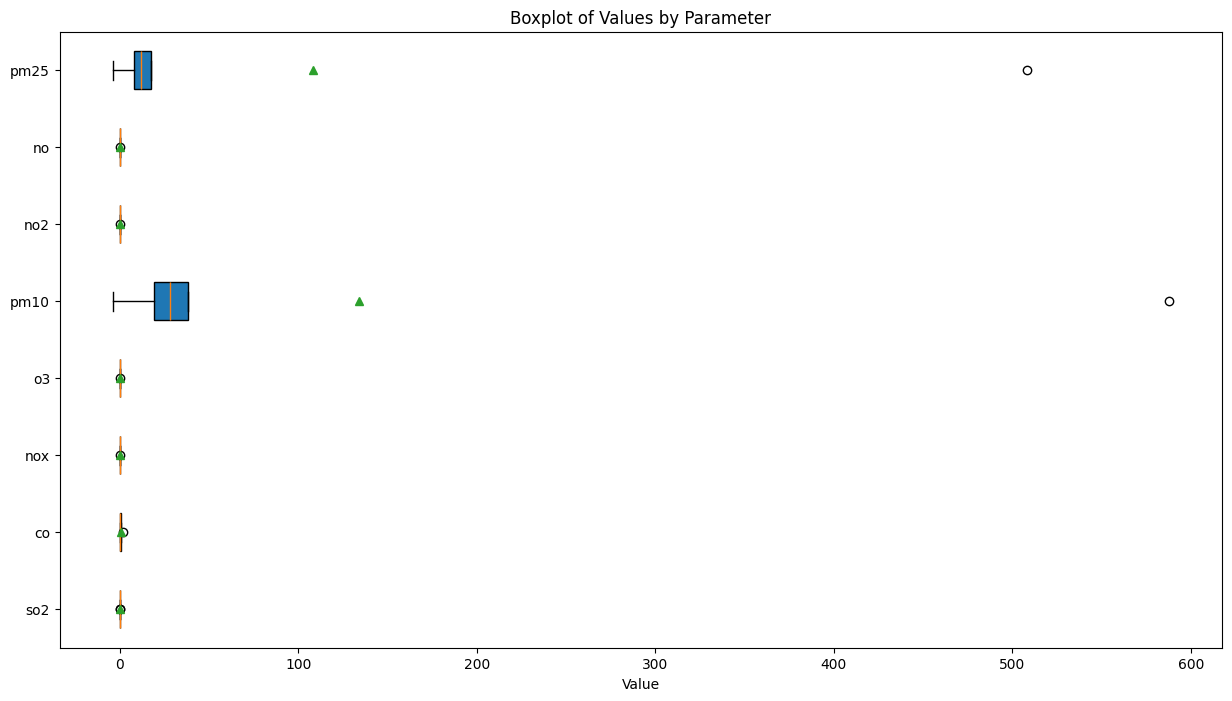

In [40]:
# Creating a boxplot using matplotlib
fig, ax = plt.subplots(figsize=(15, 8))

# Preparing data for plotting
parameters = list(boxplot_data.keys())
boxplot_stats = [
    [
        boxplot_data[param]["min"],
        boxplot_data[param]["q1"],
        boxplot_data[param]["median"],
        boxplot_data[param]["q3"],
        boxplot_data[param]["max"],
    ]
    for param in parameters
]

# Creation of boxplots
ax.boxplot(
    boxplot_stats,
    vert=False,  # Horizontal boxplots
    patch_artist=True,  # Fill boxes with color
    showmeans=True,  # Show the mean as a point
    meanline=False
)

# As for this, I customized the boxplot with legends in their parameters
ax.set_yticks(range(1, len(parameters) + 1))
ax.set_yticklabels(parameters)
ax.set_xlabel("Value")
ax.set_title("Boxplot of Values by Parameter")
plt.show()

After creating the boxplot, I have observed that the boxplot alone does not directly confirm the hypothesis of redundancy between `no`, `no2`, and `nox`. However, it just provides context about the variability and measurement range of `no` compared to other sensors, which might suggest similarity.

With that being said, to test my hypothesis properly, I need **correlation analysis** or predictive modeling to demonstrate that `no`can be inferred from `no2` and `nox`.

In [41]:
from pyspark.sql.functions import corr

In [42]:
# Filtering the DataFrame for relevant sensors
sensors_to_analyze = ['no', 'no2', 'nox']
sensor_dfs = {sensor: df_7936.filter(col("parameter") == sensor).select("datetime", "value") for sensor in sensors_to_analyze}

# Joining the filtered DataFrames on datetime to align sensor values
joined_df = sensor_dfs['no'].alias("no").join(
    sensor_dfs['no2'].alias("no2"), on="datetime", how="inner"
).join(
    sensor_dfs['nox'].alias("nox"), on="datetime", how="inner"
)

# Renaming columns for clarity
joined_df = joined_df.select(
    col("no.value").alias("no_value"),
    col("no2.value").alias("no2_value"),
    col("nox.value").alias("nox_value"),
)

# Computing correlations
correlations = {}
for sensor1 in ['no_value', 'no2_value', 'nox_value']:
    for sensor2 in ['no_value', 'no2_value', 'nox_value']:
        if sensor1 != sensor2:
            corr_value = joined_df.stat.corr(sensor1, sensor2)
            correlations[(sensor1, sensor2)] = corr_value

# Displaying correlations
for pair, value in correlations.items():
    print(f"Correlation between {pair[0]} and {pair[1]}: {value}")

Correlation between no_value and no2_value: 0.6523963728006789
Correlation between no_value and nox_value: 0.9262243677100076
Correlation between no2_value and no_value: 0.6523963728006789
Correlation between no2_value and nox_value: 0.8899215584076696
Correlation between nox_value and no_value: 0.9262243677100076
Correlation between nox_value and no2_value: 0.8899215584076696


### Scatterplot

In [43]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

In [44]:
# Extracting data from PySpark DataFrame for each pair
no_no2 = joined_df.select(col("no_value").alias("x"), col("no2_value").alias("y")).collect()
no_nox = joined_df.select(col("no_value").alias("x"), col("nox_value").alias("y")).collect()
no2_nox = joined_df.select(col("no2_value").alias("x"), col("nox_value").alias("y")).collect()

In [45]:
# Converting the collected rows into lists of values
def extract_xy(pairs):
    x_values = [row['x'] for row in pairs]
    y_values = [row['y'] for row in pairs]
    return x_values, y_values

no_no2_x, no_no2_y = extract_xy(no_no2)
no_nox_x, no_nox_y = extract_xy(no_nox)
no2_nox_x, no2_nox_y = extract_xy(no2_nox)

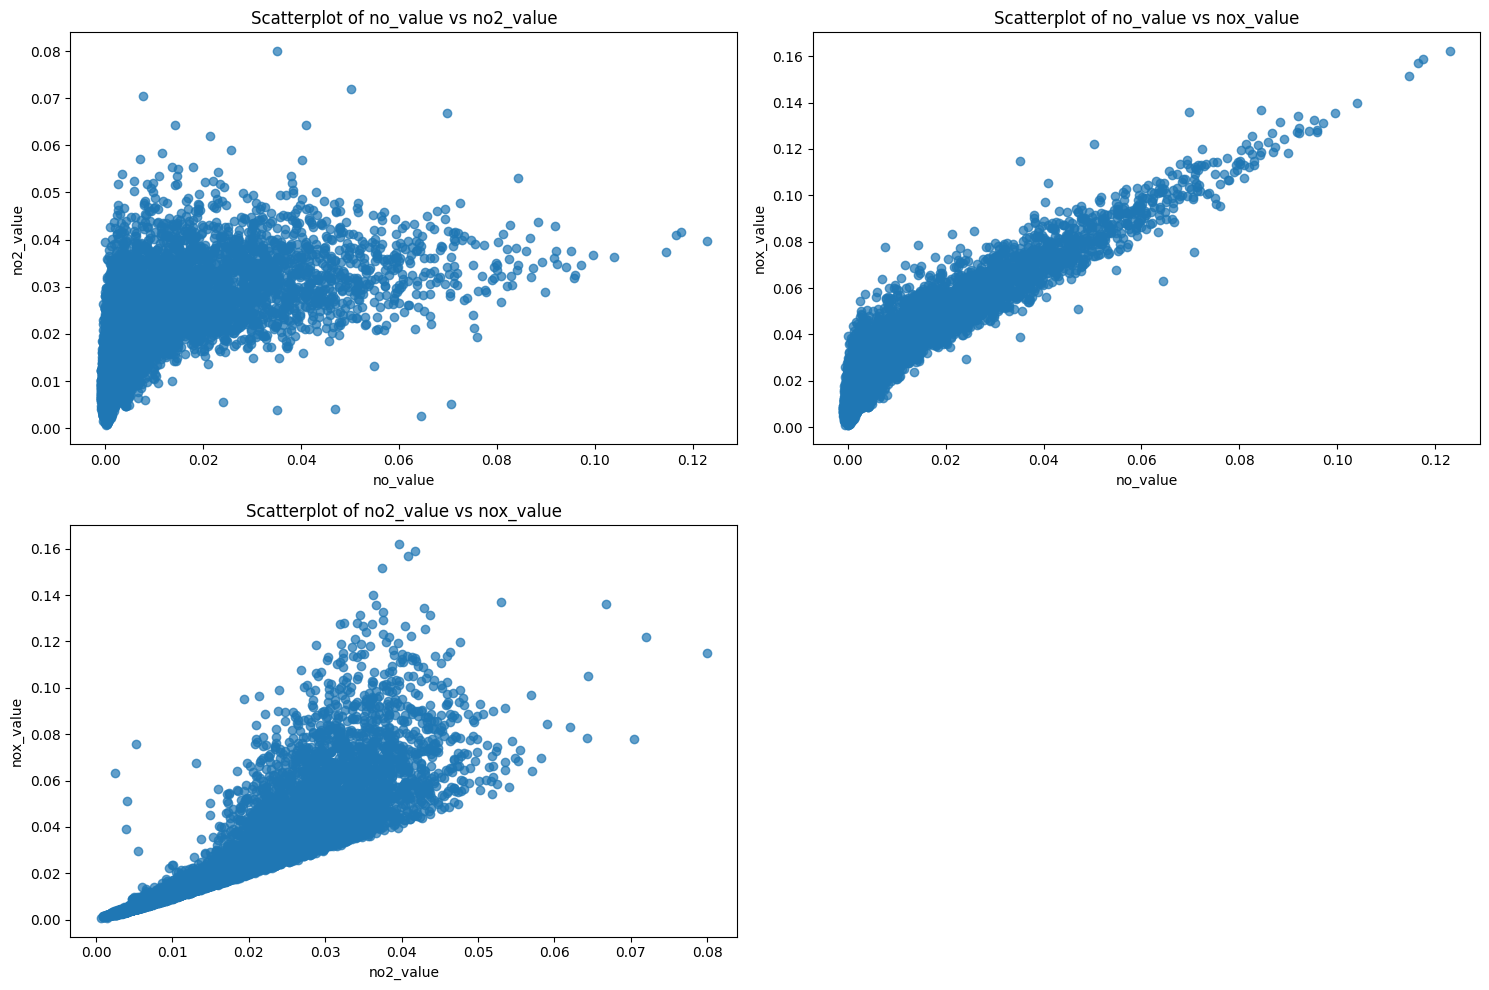

In [46]:
# Plotting the scatterplots
plt.figure(figsize=(15, 10))

# no vs no2
plt.subplot(2, 2, 1)
plt.scatter(no_no2_x, no_no2_y, alpha=0.7)
plt.title("Scatterplot of no_value vs no2_value")
plt.xlabel("no_value")
plt.ylabel("no2_value")

# no vs nox
plt.subplot(2, 2, 2)
plt.scatter(no_nox_x, no_nox_y, alpha=0.7)
plt.title("Scatterplot of no_value vs nox_value")
plt.xlabel("no_value")
plt.ylabel("nox_value")

# no2 vs nox
plt.subplot(2, 2, 3)
plt.scatter(no2_nox_x, no2_nox_y, alpha=0.7)
plt.title("Scatterplot of no2_value vs nox_value")
plt.xlabel("no2_value")
plt.ylabel("nox_value")

# Adjusting the layout and display the plots
plt.tight_layout()
plt.show()

# Line chart

In [47]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

In [48]:
# Selecting and collecting the data for plotting
sensor_data = joined_df.select(
    col("no_value").alias("NO"),
    col("no2_value").alias("NO2"),
    col("nox_value").alias("NOx")
).collect()

In [49]:
# Converting to lists for plotting
timestamps = range(len(sensor_data))  # Simulate sequential timestamps
no_values = [row["NO"] for row in sensor_data]
no2_values = [row["NO2"] for row in sensor_data]
nox_values = [row["NOx"] for row in sensor_data]

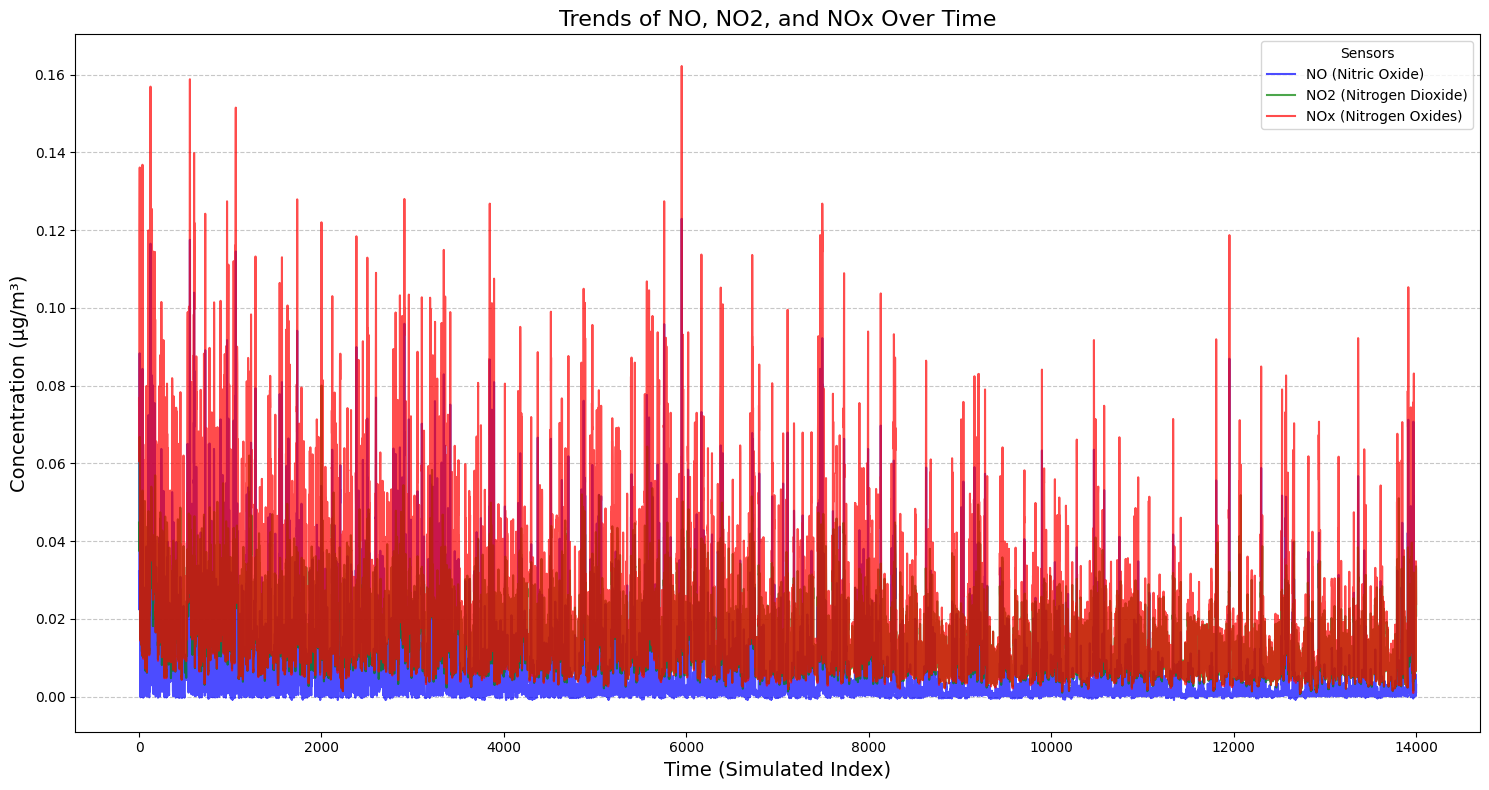

In [50]:
# This plots the line chart
plt.figure(figsize=(15, 8))

plt.plot(timestamps, no_values, label="NO (Nitric Oxide)", color="blue", alpha=0.7)
plt.plot(timestamps, no2_values, label="NO2 (Nitrogen Dioxide)", color="green", alpha=0.7)
plt.plot(timestamps, nox_values, label="NOx (Nitrogen Oxides)", color="red", alpha=0.7)

# Adding titles and labels
plt.title("Trends of NO, NO2, and NOx Over Time", fontsize=16)
plt.xlabel("Time (Simulated Index)", fontsize=14)
plt.ylabel("Concentration (µg/m³)", fontsize=14)
plt.legend(title="Sensors", loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displays the chart
plt.tight_layout()
plt.show()

# Line plot

In [64]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, to_timestamp

In [65]:
# Converting 'datetime' to timestamp for proper sorting
df_7936 = df_7936.withColumn("datetime", to_timestamp("datetime"))

In [66]:
# Filtering the data for relevant sensors and sort by datetime
sensors_to_plot = ['no', 'no2', 'nox']
filtered_data = df_7936.filter(col("parameter").isin(sensors_to_plot)).select("datetime", "parameter", "value").orderBy("datetime")

In [67]:
# Collecting the data for each sensor
sensor_data = {}
for sensor in sensors_to_plot:
    sensor_data[sensor] = (
        filtered_data.filter(col("parameter") == sensor)
        .select("datetime", "value")
        .collect()
    )

In [68]:
# Extracting the datetime and value pairs for each sensor
sensor_plot_data = {}
for sensor, rows in sensor_data.items():
    sensor_plot_data[sensor] = {
        "datetime": [row["datetime"] for row in rows],
        "value": [row["value"] for row in rows],
    }

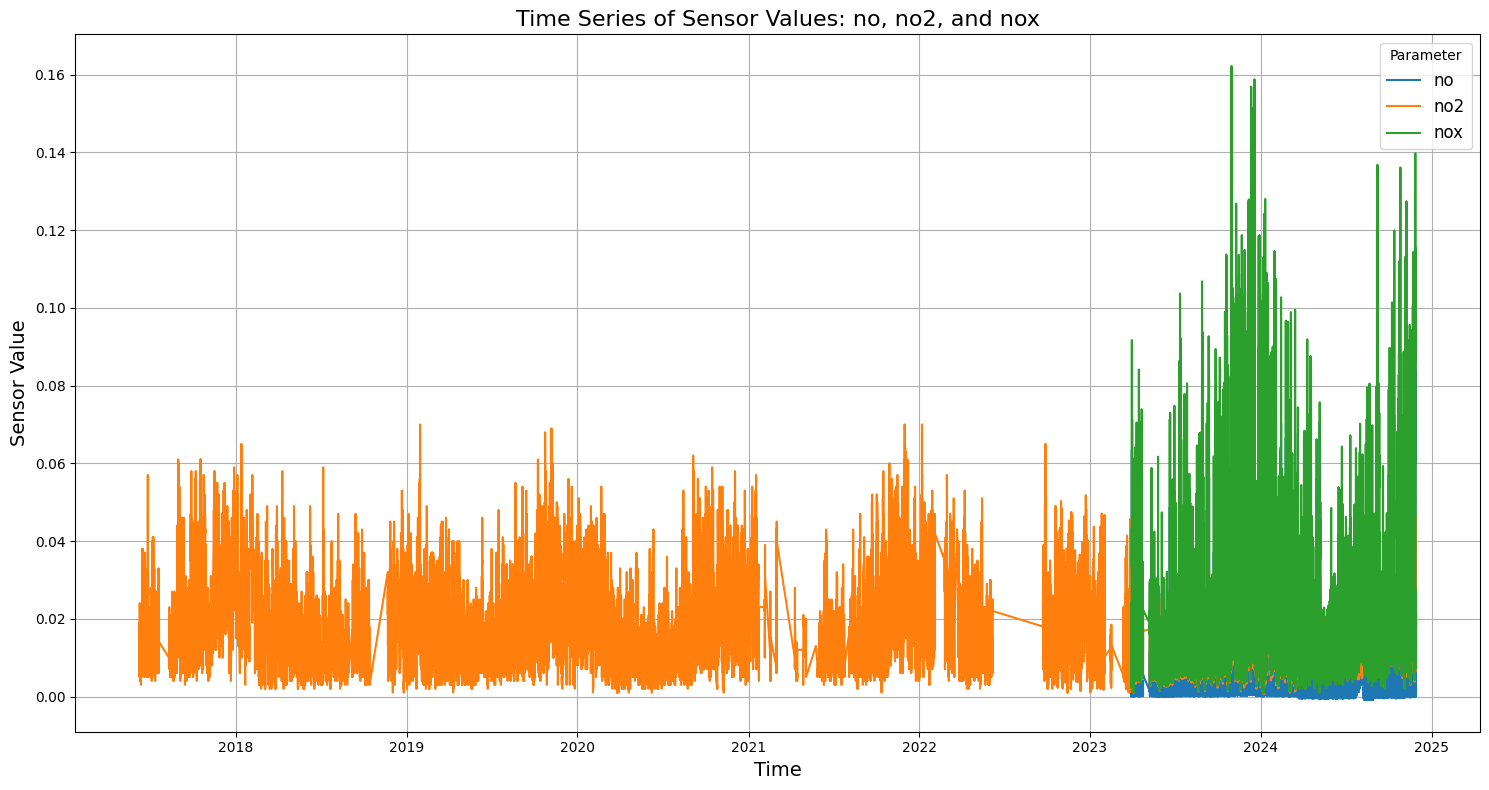

In [69]:
# Plotting
plt.figure(figsize=(15, 8))
for sensor, data in sensor_plot_data.items():
    plt.plot(data["datetime"], data["value"], label=sensor)

# Customizing the overall layout of the plot
plt.title("Time Series of Sensor Values: no, no2, and nox", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Sensor Value", fontsize=14)
plt.legend(title="Parameter", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Model Result

Based on the procedures above and my goal of reducing costs by potentially eliminating (`no`) sensor, I did **linear regression model** to show whether `no` can be predicted dependably using `no2` and `nox`.

In [51]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.sql.functions import col

In [70]:
# Preparing the feature and target columns
feature_columns = ["no2_value", "nox_value"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(joined_df.select(
    col("no_value").alias("label"),  # Target column
    col("no2_value"),
    col("nox_value")
))

In [71]:
# Splitting the data into training and testing sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

In [72]:
# Creating and training the linear regression model
lr = LinearRegression(featuresCol="features", labelCol="label")
lr_model = lr.fit(train_data)

In [73]:
# Evaluating the model
test_results = lr_model.evaluate(test_data)

In [74]:
# This will display and print evaluation metrics
print(f"R²: {test_results.r2}")
print(f"RMSE: {test_results.rootMeanSquaredError}")

R²: 0.9998760560412906
RMSE: 0.00013389460874487974


In [75]:
# Showing coefficients and intercept
print(f"Coefficients: {lr_model.coefficients}")
print(f"Intercept: {lr_model.intercept}")

Coefficients: [-1.0005450970376846,1.0026874550856768]
Intercept: -2.683898681278864e-05


## Analysis

Based on the results the results from the linear regression model strongly indicate that the NO sensor is redundant in the current air quality monitoring setup. Its values can be predicted almost perfectly using just the NO2 and NOx sensors. The model’s accuracy is incredibly high, and the predictions match the actual data almost exactly, and the prediction errors are tiny. Since NO is so closely tied to NO2 and NOx, the NO sensor does not add much extra value. By removing it, I could save on costs and maintenance without losing accuracy in monitoring air quality. Before making this change, though, I will make sure to test the model with data from different times and conditions to ensure it is reliable in all situations.


## Conclusion

Therefore, I conlude that, eliminating the ‘no’ (Nitric Oxide) sensor will not have a major effect on air quality monitoring, according to the procedure and analysis. A reliable linear regression model can accurately predict ‘no’ values due to the strong linear relationship between ‘no’, ‘no2’, and ‘nox’.

The regression model's strong and incredibly low RMSE which supports the claim that the ‘no’ sensor is redundant and that its values can be derived from ‘no2’ and ‘nox’. These findings suggest a significant connection between ‘no’, ‘no2’, and ‘nox’.

Without sacrificing the accuracy of the data from air quality monitoring, removing the ‘no’ sensor from the designated area (N. Mai, Los Angeles, CA) will lower expenses associated with equipment purchase or maintenance. This is in line with the project's goal.

This shows how correlations and predictive modelling can be used to optimize sensors in air quality monitoring systems. This method can be expanded to assess more sensors in comparable setups.

# References

Davda, K. (2024, June 27). What is low-cost air quality monitoring, and what are its Working principles? Oizom. https://oizom.com/what-is-low-cost-air-quality-monitoring/

Great Basin Unified Air Pollution Control District (n.d.). Low-Cost Air Quality Sensors. https://www.gbuapcd.org/AirMonitoringData/LowCostSensors/

Kang, Y., Aye, L., Ngo, T. D., & Zhou, J. (2021). Performance evaluation of low-cost air quality sensors: A review. The Science of the Total Environment, 818, 151769–151769. https://doi.org/10.1016/j.scitotenv.2021.151769

Kunak Technologies S.L. (2023, June 30). The power of low-cost air quality sensors for cleaner environments. Kunak. https://kunakair.com/low-cost-air-quality-sensors/

OpenAQ Location ID 7936. (n.d.). OpenAQ Explorer. https://explore.openaq.org/locations/7936

World Meteorological Organization. (2024, June 13). Low-cost sensors can improve air quality monitoring and people’s health. https://wmo.int/media/news/low-cost-sensors-can-improve-air-quality-monitoring-and-peoples-health